In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

# %matplotlib notebook


import sys
sys.path.append("../incl/")

# import ELPH_utils
# import ELPH_Scaler
# import ELPH_Optimizer
# import ELPH_Dim_Reducer
# import ELPH_VAR_Transformer

# from ELPH_RDNLVAR import RDNLVAR

In [2]:



import os
path = '/home/agluedge/Preprints/ELPH/data/run2_poly_features_rdim/data/'

filenames = []
# r=root, d=directories, f = filenames
for r, d, f in os.walk(path):
    for file in f:
        if 'rdim_' in file:
            filenames.append(os.path.join(r, file))

#for f in filenames:
    #print(f)

from natsort import realsorted
filenames = realsorted(filenames)


# ##print filenames
# for f in filenames:
#     print(f)
# nYdata = len(filenames)
# print(nYdata)
    
  
scans = [] # that data goes into this list
for fn in filenames:
  scans.append(np.loadtxt(fn)) #load linescan an append to the list of linescans - each linescan is matrix

scans = np.asarray(scans).T #create numpy ndarray from list -- contains all the data -- format [number of files, sweep steps, data column]
print (scans.shape)

(6, 36)


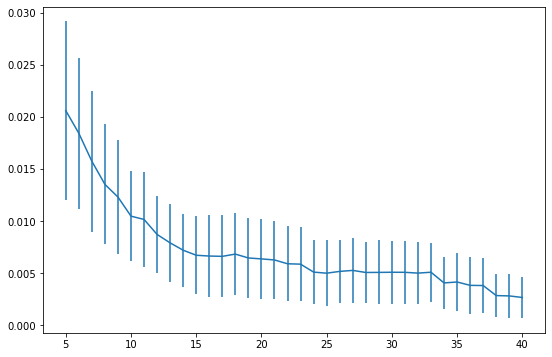

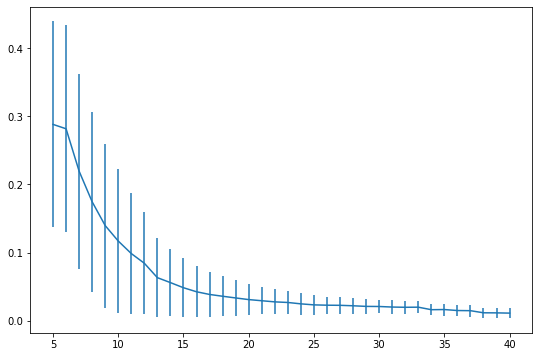

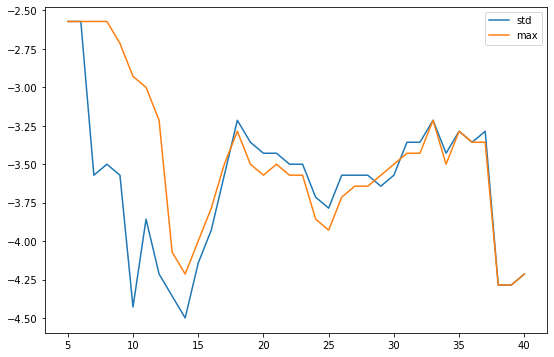

In [3]:
rdimAr = range(5,5+scans.shape[1],1)


plt.errorbar(rdimAr, scans[0], yerr=scans[1])
plt.show()

plt.errorbar(rdimAr, scans[2], yerr=scans[3])
plt.show()

plt.plot(rdimAr, scans[4], label='std')
plt.plot(rdimAr, scans[5], label='max')
plt.legend()
plt.show()

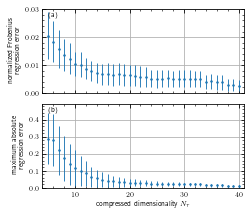

In [5]:

from matplotlib import rc
rc('text', usetex=True)

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 7
fig = plt.figure(figsize=(3.5,3.0))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=2, ncols=1, width_ratios=[1], height_ratios=[1,1])


####################################################
####################################################
####################################################

ax00 = plt.subplot(gs[0,0])

plt.grid(0.5)

plt.errorbar(rdimAr, scans[0], yerr=scans[1], ls='none', lw=0.9, marker='o', ms=1.5)

plt.xlim(4,41)
plt.ylim(0,0.03)


plt.ylabel('normalized Frobenius\nregression error')


    
ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(2))
ax00.xaxis.set_major_formatter(ticker.NullFormatter())
ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.002))
# ax00.yaxis.set_major_formatter(ticker.NullFormatter())
# ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(a)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)


####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[1,0])

plt.grid(0.5)

plt.errorbar(rdimAr, scans[2], yerr=scans[3], ls='none', lw=0.9, marker='o', ms=1.5)

plt.xlim(4,41)
plt.ylim(0,0.49)


plt.ylabel('maximum absolute\nregression error')
plt.xlabel(r'compressed dimensionality $N_r$')



    
ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(2))
# # ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# # ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))
# ax00.yaxis.set_major_formatter(ticker.NullFormatter())
# ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################

plt.tight_layout()

# plt.subplots_adjust(left=0.11, bottom=0.09, right=0.84, top=0.97, wspace=0.05, hspace=0.3)

plt.savefig('/home/agluedge/Preprints/ELPH/figs/poly_rdim.pdf', dpi=600)
plt.show()

